In [1]:
# Import packages
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from matplotlib import cm
import matplotlib
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon
import os

# Set plot parameters
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'font.family': 'serif',
   'legend.fontsize': 10,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [2]:
#%matplotlib widget

### Loading the data

In [3]:
fig_path = 'C:/Users/Carlota/Desktop/Figs'
policy = '2023_05_17_18_05_04'
env_name = 'myoLegReachFixed-v1'
pkl_path = '../pkl/' + env_name + '/' + policy 

data_path = pkl_path + '.pkl'

with open(data_path, "rb") as input_file:
   data = pickle.load(input_file)

finalReward = {}
for d in data['modelInfo']['rewardDict']:
    for key, value in d.items():
        if key not in finalReward:
            finalReward[key] = []
        finalReward[key].append(value)
data['modelInfo']['rewardDict'] = {}
data['modelInfo']['rewardDict'] = finalReward


save = True # Mark as True to save the plots in fig_path
pkl_path = '../pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
superDict = {}
for k in range(100):
    data_path = pkl_path + str(k) + '.pkl'
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    superDict[k] = data
ntrials = len(superDict)

for i in range(ntrials): 
    finalReward = {}
    for d in superDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    superDict[i]['modelInfo']['rewardDict'] = {}
    superDict[i]['modelInfo']['rewardDict'] = finalReward



In [4]:
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

# Generate an array of values ranging from 0 to 1
values = np.linspace(0, 1, ntrials)
cmap = ListedColormap(plt.cm.viridis(values)).colors

C:\Users\Carlota\AppData\Local\Temp\ipykernel_15152\1939104910.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


Does it ever fall? 

In [5]:
when_list, mag_list = [], []
for i in range(ntrials):
    arr = superDict[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    when_list.append(when)

nonzero_values = []
idx = []
for i, value in  enumerate(when_list):
    if value != 0:
        idx.append(i)
        nonzero_values.append(value)

print(f'Succes rate: {100*len(when_list)/ntrials} %')

Succes rate: 100.0 %


Train Reward

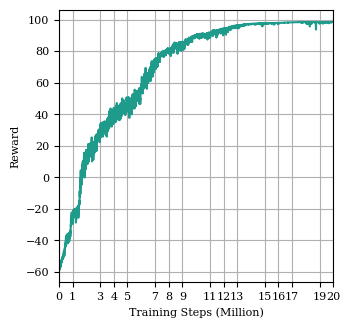

In [6]:
# Train reward
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3.54, 3.54))
x = np.linspace(0, data['modelInfo']['trainingSteps']/1000000, len(data['tensorBoard']['epMeanReward']))
ax.plot(x, data['tensorBoard']['epMeanReward'], color = cmap1[6])
ax.set_xlim(x[0], x[-1])
ax.set_xticks(np.round(np.linspace(x[0], x[-1], 16)))
ax.set_xlabel('Training Steps (Million)')
ax.set_ylabel('Reward')
ax.grid()

if save: 
    fig_name = 'trainingReward'
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean error + SD

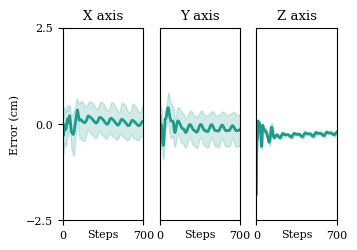

In [7]:
error = []
for i in range(ntrials): 
    error.append(np.array(superDict[i]['modelInfo']['reachError']).T)

error_x, error_y, error_z = [],[],[]
for i in range(len(error)): 
    if i in idx: continue
    else: 
        error_x.append(error[i][0])
        error_y.append(error[i][1])
        error_z.append(error[i][2])

f, ax = plt.subplots(nrows = 1, ncols =3, figsize = (3.54, 2.5)) 
l = ['X axis', 'Y axis', 'Z axis']
lim = 2.5
for i in range(3): 
    if i == 0: data = error_x
    elif i == 1: data = error_y
    elif i == 2: data = error_z
    mean = np.mean(data, axis = 0)*100
    std = np.std(data, axis = 0)*100
    ax[i].plot(mean, color=cmap1[6], linewidth = 2)
    ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[6], alpha=0.2)
    ax[i].set_ylim(-lim, lim)
    ax[i].set_yticks([-lim, 0, lim])
    ax[i].set_title(l[i])
    ax[i].set_xlim(0, 700)
    ax[i].set_xticks([0, 700]) 
    ax[i].set_xlabel('Steps')
    ax[i].xaxis.set_label_coords(.5, -0.05)
    if i != 0: ax[i].set_yticks([])
    if i == 2: ax[i].set_xticks([0, 700])  
ax[0].set_ylabel('Error (cm)')
#ax[2].xaxis.set_label_coords(.5, -0.1)
# plt.tight_layout()

if save: 
    fig_name = '_meanError'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name +'.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean COM displacement + SD

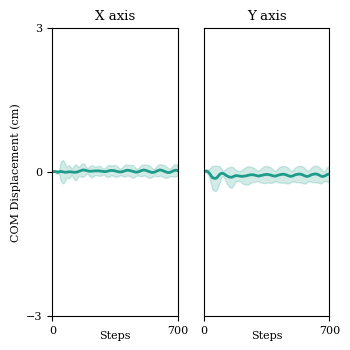

In [8]:
com = []
for i in range(ntrials): 
    com.append(np.array(superDict[i]['bodyInfo']['com']).T)

com_x, com_y = [],[]
for i in range(len(com)): 
    if i in idx: continue
    else: 
        com_x.append(com[i][0])
        com_y.append(com[i][1])

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (3.54, 3.54)) 

lim = 3
l = ['X axis', 'Y axis']
for i in range(2): 
    if i == 0: data = com_x - com_x[0]
    elif i == 1: data = com_y - com_y[0]
    mean = np.mean(data, axis = 0)*100
    std = np.std(data, axis = 0)*100
    ax[i].plot(mean, color=cmap1[6], linewidth = 2)
    ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[6], alpha=0.2)
    ax[i].set_ylim(-lim, lim)
    ax[i].set_title(l[i])
    ax[i].set_xlim(0, 700)
    if i != 2: ax[i].set_yticks([])
    ax[i].set_xticks([0, 700])  
    ax[i].set_xlabel('Steps')
    ax[i].xaxis.set_label_coords(.5, -0.05)
ax[0].set_yticks([-lim, 0, lim])
ax[0].set_ylabel('COM Displacement (cm)')
plt.tight_layout()

if save: 
    fig_name = '_meancomDisp'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean COM movement scatter

C:\Users\Carlota\AppData\Local\Temp\ipykernel_15152\1602230182.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 29)
C:\Users\Carlota\AppData\Local\Temp\ipykernel_15152\1602230182.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(corners[:,[0,1,3,2]].T, color = 'white', closed=True, fill=True, alpha = 0.2, edgecolor='none')


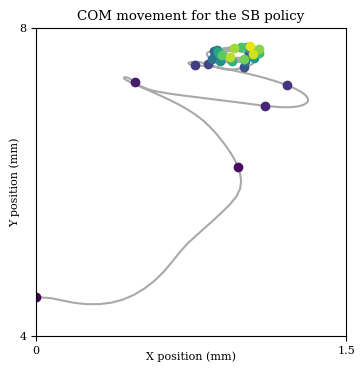

In [9]:
from matplotlib.patches import Polygon

bos_list, com_list = [], []

for t in range(ntrials): 
    data = superDict[t]
    bos_list.append(np.array(data['bodyInfo']['bos']))
    com_list.append(np.array(data['bodyInfo']['com']))

com_mean = np.mean(com_list, axis = 0)
bos_mean = np.mean(bos_list, axis = 0)
com_std = np.std(com_list, axis = 0)
bos_std = np.std(bos_list, axis = 0)
viridis = cm.get_cmap('viridis', 29)
cmap3 = viridis.colors

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
for i in range(0, 701, 100): 
    if i == 700: i = 699
    corners = bos_mean[i,:].reshape(2,4)
    polygon = Polygon(corners[:,[0,1,3,2]].T, color = 'white', closed=True, fill=True, alpha = 0.2, edgecolor='none')
    ax.add_patch(polygon)   
ax.plot(com_mean[:,0], com_mean[:,1], color = 'darkgray')


for j, i in enumerate(range(0, data['modelInfo']['testSteps'], 25)):
        ax.plot(com_mean[i][0], com_mean[i][1], color = cmap3[j], marker = 'o')
        # ax.errorbar(com_mean[i][0], com_mean[i][1], yerr = com_std[i,1], xerr = com_std[i,0], color = cmap1[6], alpha = 0.5)

ax.set_yticks([0.04, 0.08], [4, 8])
ax.set_xticks([-0.00068662, 0.015], [0, 1.5])
ax.set_xlim(-0.00068662, 0.015)
ax.set_ylim(0.04, 0.08)
ax.set_title('COM movement for the SB policy')
ax.set_xlabel('X position (mm)')
ax.set_ylabel('Y position (mm)')
ax.xaxis.set_label_coords(.5, -0.05)
ax.yaxis.set_label_coords(-0.05,0.5)

if save: 
    fig_name = '_com_movement'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Muscle Activations

In [10]:
Ract, Lact = [], []
for i in range(ntrials): 
    data = superDict[i]
    muscleAct = np.array(data['muscleInfo']['muscleActivation']).T
    Ract.append(muscleAct[:40, :])
    Lact.append(muscleAct[40:, :])

Ract_mean = np.mean(Ract, axis = 0)
Lact_mean = np.mean(Lact, axis = 0)

data = superDict[0]
tendonNames = data['modelInfo']['tendonNames']
muscleNames = []

for tendon in tendonNames[:40]:
    muscle = tendon.replace('_r_tendon', '')
    muscleNames.append(muscle)

# Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

# Get the indices that would sort the musnames array in the desired order
sorted_indices = np.argsort([desired_order.index(name) for name in muscleNames])

musnames_sorted, Rmusact_sorted, Lmusact_sorted = [], [], []

for k in sorted_indices: 
    musnames_sorted.append(muscleNames[k])
    Rmusact_sorted.append(Ract_mean[k])
    Lmusact_sorted.append(Lact_mean[k])

ract = np.array(Rmusact_sorted)
lact = np.array(Lmusact_sorted)


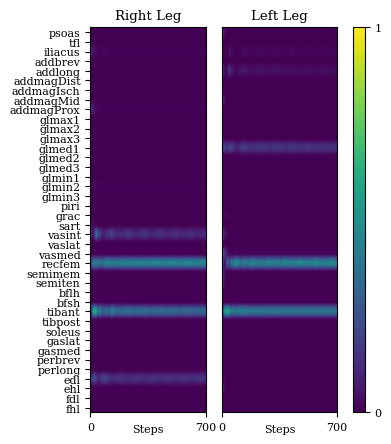

In [11]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(3.54, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.1])
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]


cmaps = ['viridis', 'viridis']
for row in range(2):
    ax = axs[row]
    if row == 0:
        data_plot = ract
    elif row == 1:
        data_plot = lact
    pcm = ax.imshow(data_plot, cmap='viridis', aspect='auto', vmin=0, vmax=1)
    ax.set_yticks(range(40), musnames_sorted, fontsize=8)
    
    if row == 0:
        ax.set_xticks([])
        
    if row == 1:
        ax.set_yticks([])
        
        cbar = fig.colorbar(pcm, ax=axs, cax=fig.add_subplot(gs[2]), ticks=[0, 1])
        cbar.ax.yaxis.set_ticks([0, 1])
    
    ax.set_xticks([0, 700])
    ax.set_xlabel('Steps')
    ax.xaxis.set_label_coords(.5, -0.03)

axs[0].set_title('Right Leg')
axs[1].set_title('Left Leg')
fig.subplots_adjust(wspace=0.2)

if save: 
    fig_name = '_musAct'
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Joint angles and torques

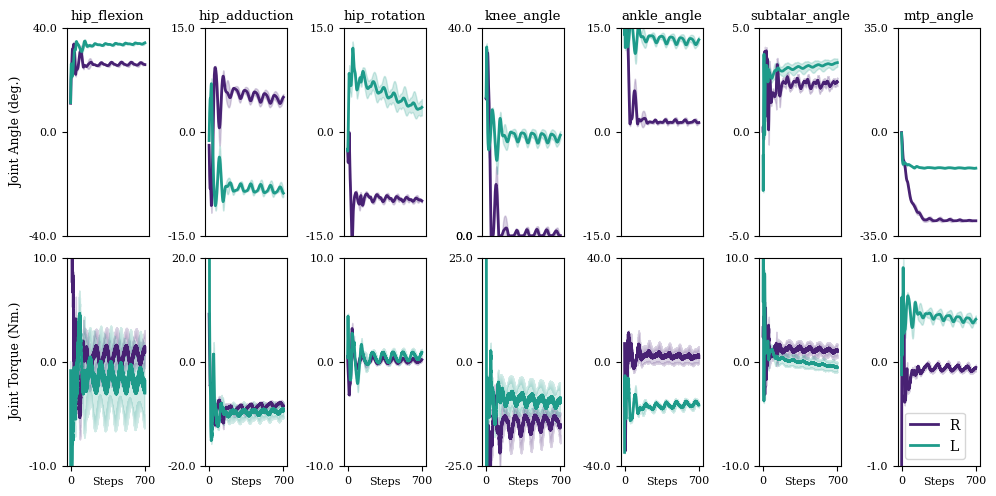

In [12]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter

not_interested = ['knee_angle_r_translation2', 'knee_angle_r_translation1', 'knee_angle_r_rotation2', 'knee_angle_r_rotation3', 'knee_angle_r_beta_translation2', 'knee_angle_r_beta_translation1', 'knee_angle_r_beta_rotation1',  'knee_angle_l_translation2', 'knee_angle_l_translation1', 'knee_angle_l_rotation2', 'knee_angle_l_rotation3', 'knee_angle_l_beta_translation2', 'knee_angle_l_beta_translation1', 'knee_angle_l_beta_rotation1']

# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-40, 40],
    'Hip Adduction': [-15, 15],
    'Hip Rotation': [-15, 15],
    'Knee Angle': [0, 40],
    'Ankle Angle': [-15, 15],
    'Subtalar Angle': [-5, 5],
    'MTP Angle': [-35, 35]
}

rom_dict = {
    'Hip Flexion': [-10, 10],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-10, 10],
    'Knee Angle': [-25, 25],
    'Ankle Angle': [-40, 40],
    'Subtalar Angle': [-10, 10],
    'MTP Angle': [-1, 1]
}

yl = ['Joint Angle (deg.)', 'Joint Torque (Nm.)']
k = [1, 6] 
ll = ['R', 'L']
f, axs = plt.subplots(nrows=2, ncols=7, figsize = (10,5))
qtau, qpos = [], []
for i in range(ntrials): 
    qtau.append(superDict[i]['jointInfo']['qtau'])
    qpos.append(superDict[i]['jointInfo']['qpos'])

qtau_dict, qpos_dict = {}, {}

for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        qtau_dict[joint], qpos_dict[joint] = {}, {}
        for j in range(len(qtau)): 
            qpos_dict[joint][j] = np.rad2deg(qpos[j][joint])
            qtau_dict[joint][j] = qtau[j][joint]

mean_dict, sd_dict = {}, {}
for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        tau = []
        mean_dict[joint], sd_dict[joint] = {}, {}
        for j in range(len( qpos_dict[joint])): 
            tau.append(qpos_dict[joint][j])
        mean_dict[joint] = np.mean(tau, axis = 0)
        sd_dict[joint] = np.std(tau, axis = 0)
steps = 700
for i, (movement, keys) in enumerate(movement_dict.items()):
    # print(keys)
    for l, key in enumerate(keys):

        if l == 0: a = 0
        if l == 1: a = 0 
        # ax  = axs[i]
        axs[a, i].plot(mean_dict[key], color = cmap1[k[l]], linewidth= 2, label = ll[l] )
        axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap1[k[l]], alpha=0.2)

        if a == 0: axs[a,i].set_title(key[:-2])
        axs[a,i].set_xticks([])
        axs[a,i].set_ylim(rom_dict_qpos[movement])
        axs[a,i].set_yticks(rom_dict_qpos[movement])
        axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
        axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[a,0].set_ylabel(yl[a], fontsize = 9)

mean_dict, sd_dict = {}, {}
for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        tau = []
        mean_dict[joint], sd_dict[joint] = {}, {}
        for j in range(len( qtau_dict[joint])): 
            tau.append(qtau_dict[joint][j])
        mean_dict[joint] = np.mean(tau, axis = 0)
        sd_dict[joint] = np.std(tau, axis = 0)
steps = 700
for i, (movement, keys) in enumerate(movement_dict.items()):
    # print(keys)
    for l, key in enumerate(keys):

        if l == 0: a = 1
        if l == 1: a = 1 
        # ax  = axs[i]
        axs[a, i].plot(mean_dict[key], color = cmap1[k[l]], linewidth= 2, label = ll[l] )
        axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap1[k[l]], alpha=0.2)

        axs[a,i].set_xticks([0, 700])
        axs[a,i].set_xlabel('Steps')
        axs[a,i].set_ylim(rom_dict[movement])
        axs[a,i].set_yticks(rom_dict[movement])
        axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
        axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[a,0].set_ylabel(yl[a], fontsize = 9) 
        axs[a, i].xaxis.set_label_coords(.5, -0.05)

axs[a,6].legend()
f.tight_layout()

if save: 
    fig_name = '_jointAnglesTorques'
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')